In [6]:
import numpy as np
import sys
import time as t
import matplotlib.pyplot as plt

#this function calculates T(N) = T_N T_(N-1) .... T_2 T_1
#for a specific time point (tau), width of disorder (w), quasienergy (e), and rescaling factor (rescale)
def Tpoint(N,tau,w=np.pi,e=0,rescale=1):
    #Tmatrix starts as the identity
    Tmatrix = np.eye(2,dtype = complex)
    #loop over N tmatrices
    for l in range(N):
        #multiply a new random Tmat as well as a factor of rescaling
        Tmatrix = rescale * randomTmat(tau,e,w) @ Tmatrix
    return Tmatrix


#this function makes the Tmats and is a transcribed version of the form in the thesis
def randomTmat(tau,e,w):
    #only two random variables are needed which are unique for this Tmat
    phiA = np.random.uniform(-w,w)
    phiB = np.random.uniform(-w,w)
    return np.array([[np.exp(1j*(e + phiA))/np.cos(tau), 1j*np.tan(tau)],
                    [-1j*np.exp(1j*(phiA - phiB))*np.tan(tau),np.exp(-1j*(e+phiB))/np.cos(tau)]])


#a power law functional form for convenience
def powerlaw(x, amp, exp):
    return amp * (x**exp)

# Transfer type system

![](../1DChiralTranslationTmat.png)
![](../Tmatrix.png)

In [7]:
#RUN THIS CELL FOR DATA GENERATION
temp = t.time() #starting timing of the run

#number of times we multiply T together
N = 10000

#number of runs (data points) per timestep
dreal = 16

#start, stop, and number of time steps
tstart = .1
tstop = .05
tsteps = 8

#time steps are equispaced or log equispaced
#tpoints = np.linspace(tstart,tstop,tsteps)
tpoints = np.logspace(np.log10(tstart),np.log10(tstop),tsteps)

#data will be stored in this variable
loclengths = np.zeros(len(tpoints))

#the guessed values of the power law relation
ConstGuess = 4.6
PowGuess = -2.05

#the strengths of intersite and onsite disorder (uniform between -W and W)
onsiteW = np.pi

#a random quasieigenvalue is chosen as it does not matter but I don't want to bias the data
qEval = np.random.uniform(-np.pi,np.pi)
print(qEval)

#this defines a unique identifier for the output files
runIdent = str(t.time())[:10]

for i in range(len(tpoints)):
    #calculating the rescaling factor for the specific timestep
    Lguess = powerlaw(tpoints[i],ConstGuess,PowGuess)
    rescale = np.exp(-2/Lguess)
    
    ##opening the file for each timestep
    #file_name1 = "lengths_T_" + str(tpoints[i]) + "0_N_" + str(N) + "_run_"+ runIdent + ".txt" 
    #f1 = open(file_name1,'x')
    
    #looped for each data point gathered in each time step
    for d in range(dreal):
        
        ##calculating the final tmatrix
        #Tmatrix = Tpoint(N,tpoints[i],onsiteW,qEval)
        ##extracting the localization length via max eigenvalue of T\daggerT
        #val = ((np.log(max(np.linalg.eigvalsh(np.conj(np.transpose(Tmatrix))@Tmatrix))))/(4*N))**(-1)
        
        #calculating the final tmatrix with rescaling
        Tmatrix = Tpoint(N,tpoints[i],onsiteW,qEval,rescale)
        #calculating the localization length accounting for rescaling
        val = ((np.log(max(np.linalg.eigvalsh(np.conj(np.transpose(Tmatrix))@Tmatrix))))/(4*N) + 1/Lguess)**(-1)
        
        ##writing the value to file
        #f1.write(str(val) + " ")
        #calculating the average at this time point
        loclengths[i] += val / dreal
    #f1.close()

#printing the timing data
print("took " + str(t.time() - temp) + " seconds.")

#printing data from the current run
print(loclengths)
print(tpoints)

1.0576113579810809
took 22.54516339302063 seconds.
[ 413.02624209  454.87386504  583.19229135  748.33666061  867.9716609
 1134.6223632  1285.06631865 1616.45507717]
[0.1        0.09057237 0.08203354 0.07429971 0.06729501 0.06095068
 0.05520448 0.05      ]


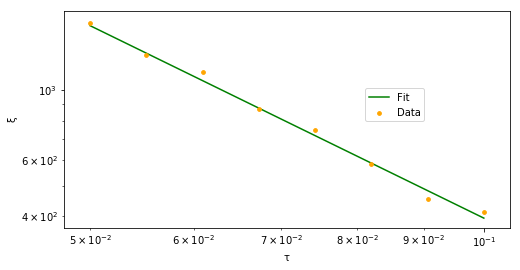

In [8]:
#Graphing the data

#set how much of the calculated data is plotted
fcut = 0
bcut = tsteps - 0

#create the figure
out, sub = plt.subplots(1,figsize=(8,4))
sub.set_ylabel("ξ")
sub.set_xlabel("τ")
sub.set_yscale('log')
sub.set_xscale('log')

#this plots the data
sub = plt.scatter(tpoints[fcut:bcut],loclengths[fcut:bcut],s=14,color="orange",zorder=1)

#this plots the best fit line according to existing data
sub = plt.plot(np.linspace(tpoints[fcut],tpoints[bcut-1],2),powerlaw(np.linspace(tpoints[fcut],tpoints[bcut-1],2),3.86,-2.01),color="green",zorder=0)

out.legend(('Fit','Data'),loc = (0.7,0.55))
#out.savefig('TmatData.png', dpi=400)